# <center>Анализ вакансий ручных тестировщиков для QA–факультета</center>

## Цель:
Выбрать и проанализировать вакансии, на которые студенты QA факультета могут откликнуться и получить приглашение на интервью. Оценить объем рынка вакансий для начинающих тестировщиков.

#### Содержание:
1. [Обзор данных](#info)
2. [Предобработка данных](#pretreatment)
3. [Исследовательский анализ](#research_analysis)
4. [Вопросы от заказчика](#questions)
5. [Выводы и рекомендации](#summary)

### Импорты:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russian')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from pymystem3 import Mystem
m = Mystem()

In [4]:
import sys
import locale

def set_rus_locale():
    locale.setlocale(
        locale.LC_ALL,
        'rus_rus' if sys.platform == 'win32' else 'ru_RU.UTF-8')
    
set_rus_locale()

## Обзор данных:<a id="info"></a>

Была предоставлена таблица с выгрузкой всех вакансий в области информационных технологий, интернета, телеком за 2017, 2018 и 2019 года. Т.к. нас интересуют только вакансии тестировщиков, был сделан срез по ключевым словам и сохранен в файл.

In [5]:
# hh = pd.read_csv(r'D:\Code\Notebooks\Яндекс.Практикум\HeadHunter\jobs_yandex_prakt.csv', sep='|')

# hh['vacancy_name'] = hh['vacancy_name'].str.lower()
# targets = ['qa', 'qc', 'quality assurance', 'test', 'тестир']

# hh_qa = hh[hh['vacancy_name'].apply(lambda sentence: any(word in sentence for word in targets))].reset_index()

# hh_qa.to_csv('hh_qa.csv')

**12 столбцов, 680561 строк в исходном датафрейме**

___

### Загрузка данных:

In [6]:
hh_qa = pd.read_csv('hh_qa.csv')

In [7]:
display(hh_qa.head(5))
display(hh_qa.info())

,Unnamed: 0,index,Unnamed: 0.1,vacancy_id,vacancy_name,vacancy_description,experience_required,type_of_employment,work_schedule,publication_day,city_name,region_name,country_name,list_of_profarea_ids,list_of_skill_names
0,0,14,287960,23920048,тестировщик по,<p><strong>Обязанности:</strong></p> <p>- Тест...,no_experience,full,full_day,2017-12-25 00:00:00.000,Москва,Москва,Россия,1,[None]
1,1,15,2826,22786768,qa lead / automation lead,<p><strong>Magenta</strong> <strong>Technology...,up_to_6_years,full,full_day,2017-09-19 00:00:00.000,Самара,Самарская область,Россия,1,"['QA', 'XML', 'автоматизированное тестирование..."
2,2,36,762452,19385470,аналитик-тестировщик,<p><strong>Крупный системный интегратор пригла...,up_to_3_years,full,full_day,2017-01-23 00:00:00.000,Москва,Москва,Россия,1,[None]
3,3,39,1201893,20553589,qa automation engineer,<p>CodeSWAT is looking for QA Automation Engin...,up_to_3_years,full,full_day,2017-05-16 00:00:00.000,Минск,NaN,Беларусь,1,[None]
4,4,42,424763,22549584,инженер по тестированию (qc/qa),<p>НТЦ АРГУС— российский разработчик систем кл...,up_to_6_years,full,flexible,2017-09-25 00:00:00.000,Санкт-Петербург,Санкт-Петербург,Россия,1,"['Тестирование пользовательского интерфейса', ..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22390 entries, 0 to 22389
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            22390 non-null  int64 
 1   index                 22390 non-null  int64 
 2   Unnamed: 0.1          22390 non-null  int64 
 3   vacancy_id            22390 non-null  int64 
 4   vacancy_name          22390 non-null  object
 5   vacancy_description   22390 non-null  object
 6   experience_required   22390 non-null  object
 7   type_of_employment    22390 non-null  object
 8   work_schedule         22390 non-null  object
 9   publication_day       22390 non-null  object
 10  city_name             22390 non-null  object
 11  region_name           19805 non-null  object
 12  country_name          22390 non-null  object
 13  list_of_profarea_ids  22390 non-null  object
 14  list_of_skill_names   22390 non-null  object
dtypes: int64(4), object(11)
memory usage

None

- vacancy_id - идентификатор вакансии
- vacancy_name - название вакансии
- vacancy_description - описание вакансии
- experience_required - требуемый опыт
- type_of_employment - тип занятости
- work_schedule - тип рабочего графика
- publication_day - дата публикации
- city_name - назавние города
- region_name - название региона
- country_name - название страны
- list_of_profarea_ids - список профобластей и специализаций
- list_of_skill_names - список требуемых навыков

#### Вывод:
- Пропуски в названии региона характерны для Беларуси и Казахстана, где их указание необязательно 


- Удалить первые 3 столбца, это ошибка при выгрузке данных
- Привести дату к нужному формату
- Убрать HTML теги из описания вакансий

## Предобработка данных<a id="pretreatment"></a>

Удалим столбцы-ошибки:

In [8]:
hh_qa = hh_qa.drop(columns=(['Unnamed: 0', 'Unnamed: 0.1', 'index']))

Приведем дату к формату datetime и выделим из нее номер месяца, название месяца и год:

In [9]:
hh_qa['publication_day'] = pd.to_datetime(hh_qa['publication_day'], format='%Y-%m-%d %H:%M:%S.%f')
hh_qa['publication_year'] = hh_qa['publication_day'].dt.year
hh_qa['publication_month'] = hh_qa['publication_day'].dt.month
hh_qa['publication_month_name'] = hh_qa['publication_day'].dt.month_name(locale = 'Russian')

При парсинге данных в описании вакансий остались HTML теги, очистим с применением регульрных выражений:

In [10]:
hh_qa['vacancy_description'] = hh_qa['vacancy_description'].apply(lambda x: re.sub(r'\<[^>]*\>', '', x)).str.lower()

___

## Исследовательский анализ данных<a id="research_analysis"></a>

### Период данных:

In [11]:
print('Минимальная дата:', hh_qa['publication_day'].min())
print('Максимальная дата:', hh_qa['publication_day'].max())

Минимальная дата: 2017-01-01 00:00:00
Максимальная дата: 2019-12-31 00:00:00


### Распределение вакансий по странам:

In [12]:
hh_qa['country_name'].value_counts()

Россия       19805
Беларусь      2234
Казахстан      351
Name: country_name, dtype: int64

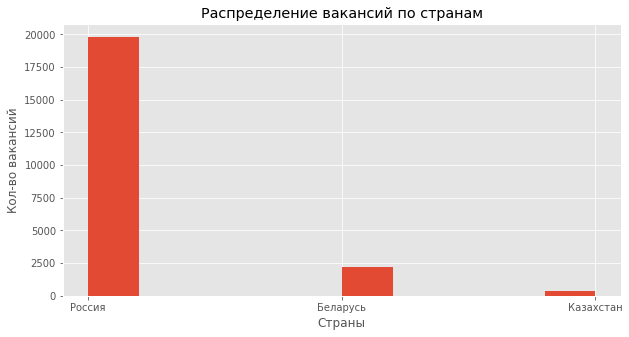

In [13]:
plt.style.use('ggplot')
country_hist = hh_qa['country_name'].hist(figsize=(10,5))
country_hist.set_title('Распределение вакансий по странам')
country_hist.set_xlabel('Страны')
country_hist.set_ylabel('Кол-во вакансий');

#### Вывод:
Основной массив данных приходится на Россию, в выборке также присутсвуют вакансии из Беларуси и Казахстана.

### Распределение вакансий по опыту:

In [14]:
hh_qa['experience_required'].value_counts().reset_index()

,index,experience_required
0,up_to_3_years,14340
1,up_to_6_years,4904
2,no_experience,2855
3,above_6_years,291


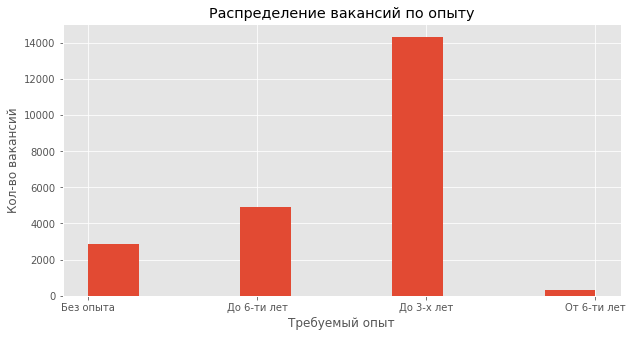

In [15]:
exp_hist = hh_qa['experience_required'].hist(figsize=(10,5))
exp_hist.set_xticklabels(('Без опыта', 'До 6-ти лет', 'До 3-х лет', 'От 6-ти лет'))
exp_hist.set_title('Распределение вакансий по опыту')
exp_hist.set_xlabel('Требуемый опыт')
exp_hist.set_ylabel('Кол-во вакансий');

#### Вывод:
Из 22т. вакансий, 14т. предполагают опыт кандидата до 3х лет и только около 2500 не требуют опыта.

### Распределение вакансий по типу занятости:

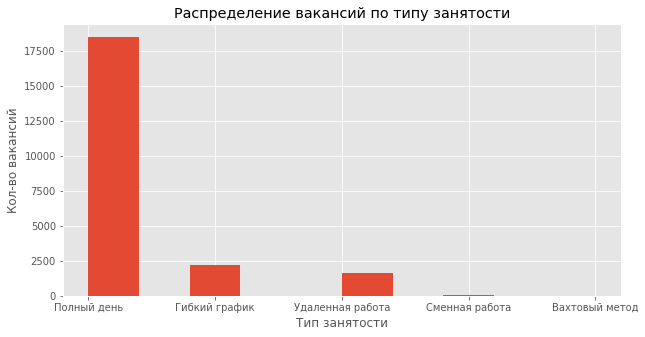

In [16]:
schedule_hist = hh_qa['work_schedule'].hist(figsize=(10,5))
schedule_hist.set_xticklabels(('Полный день', 'Гибкий график', 'Удаленная работа', 'Сменная работа', 'Вахтовый метод'))
schedule_hist.set_title('Распределение вакансий по типу занятости')
schedule_hist.set_xlabel('Тип занятости')
schedule_hist.set_ylabel('Кол-во вакансий');

#### Вывод:
Большинство вакансий предлагают полный рабочий день. Вакансий с гибким графиком и удаленной работой совсем немного, тогда как со сменным графиком и выхтовым методом практически нет (скорее всего это аномалии в данных).

### Наиболее частые навыки для вакансий без опыта

In [17]:
skills = hh_qa.query('experience_required == "no_experience"')['list_of_skill_names'].str.cat(sep=', ')
skills_list = re.findall(r"\'(.+?)\'", skills)
skill_dict = Counter(skills_list)
most_common_skills = pd.DataFrame.from_dict(skill_dict, orient='index').reset_index()
most_common_skills.columns = ['skill_name', 'count']
top_20_skills = most_common_skills.drop(index=([0, 10, 57])).sort_values(by='count', ascending=False).head(20)

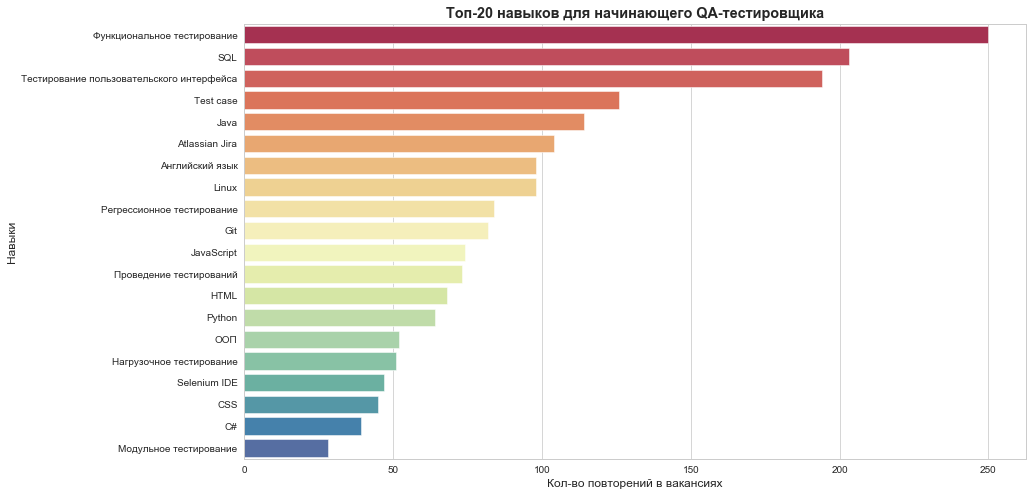

In [18]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
g = sns.barplot(data=top_20_skills, x='count', y='skill_name', palette='Spectral')
g.set_title('Топ-20 навыков для начинающего QA-тестировщика', fontweight="bold")
g.set_xlabel('Кол-во повторений в вакансиях')
g.set_ylabel('Навыки');

#### Вывод:
Самое частое требование от тестировщика - функциональное тестирование, процесс основанный на заранее известном (в некоторых случая предполагаемом) поведении пользователя. Также важно знать и уметь работать с СУБД, в первую очередь с SQL. Очень часто в описании вакансий есть упоминания про этот навык, который звучит как «Знание SQL на уровне простых запросов». Тестирование GUI также встречается довольно часто, пользовательский интерфейс – это «лицо» системы, и эффективность работы пользователя зависит от его релевантности. 

### Анализ креативности вакансий:

Для определения креативности вакансии, выбран метод отбора неформальных слов входящих в описание вакансии и их подсчета.

In [19]:
vacancy_creativity = hh_qa.query('vacancy_description.str.contains("плюш|крут|лофт|вкусн|релакс|весел")', engine='python').reset_index(drop=True)

Просмотрев описание вакансий, были выбранны корни от слов: "плюшки", "крутой", "лофт", "вкусный", "релакс", "веселый" (возможно дополнение этого списка).

In [20]:
def regex_creativ(text):
    text = re.findall(r"\b\w*(плюш|крут|лофт|вкусн|релакс|весел)\w*\b", text)
    return text

In [21]:
vacancy_creativity['words'] = vacancy_creativity['vacancy_description'].apply(regex_creativ)
vacancy_creativity['words'] = vacancy_creativity['words'].str.join(', ')

In [22]:
lst = ['плюш', 'крут', 'лофт', 'вкусн', 'релакс', 'весел']
ndf = vacancy_creativity['words'].apply(nltk.word_tokenize).apply(nltk.FreqDist).apply(pd.Series)[lst].fillna(0)

vacancy_creativity = vacancy_creativity.join(ndf, how='left')

In [23]:
dynamic_creativity = vacancy_creativity.groupby('publication_year')['крут', 'вкусн', 'плюш', 'весел', 'лофт', 'релакс'].sum().reset_index()

C:\Users\nikit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


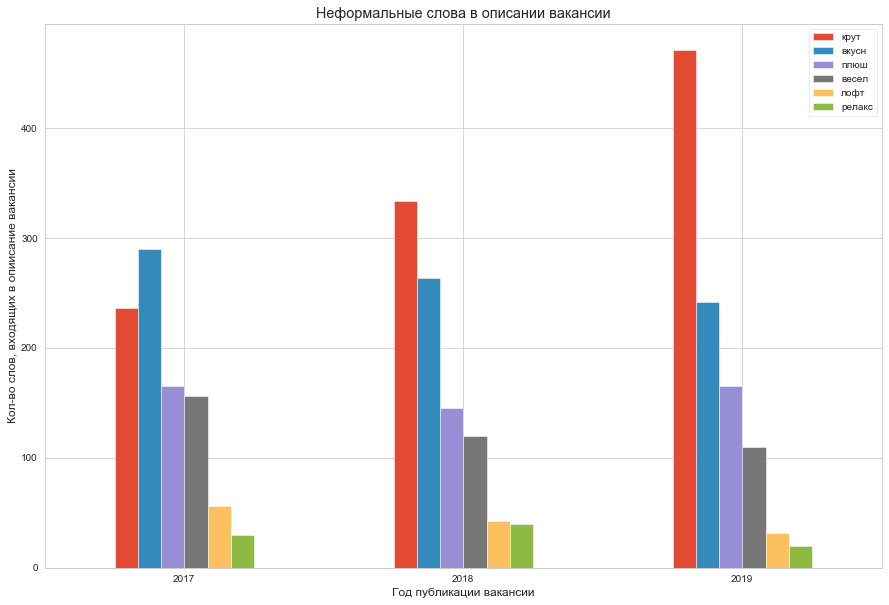

In [24]:
creativity_bar = dynamic_creativity.plot(x='publication_year', kind='bar', stacked=False, figsize=(15,10));
creativity_bar.set_xlabel('Год публикации вакансии')
creativity_bar.set_ylabel('Кол-во слов, входящих в опиисание вакансии')
creativity_bar.set_title('Неформальные слова в описании вакансии')
creativity_bar.tick_params(labelrotation=0);

#### Вывод:
В 2019 году, относительно предыдущих лет, кол-во вакансий, в которых использовались неформальные слова увеличилось. Это выделяет вакансию среди других и дает ощущение открытости и дружелюбности компании к потенциальному кандидату. В 2017 году, слова с корнем "вкусн" (вкусняшки, вкусности, вкусные обеды) превалировали над остальными, но уже в 2019 году слов с корнем "крут" стало в 2 раза больше. Чаще всего слова с корнем "крут" упоминаются в отношении к команде и офису.  

___

## Вопросы от заказчика<a id="questions"></a>

### Емкость рынка по годам.

In [25]:
year_capacity = hh_qa.groupby('publication_year')['vacancy_name'].count().reset_index()
year_capacity.columns = ['publication_year', 'vacancy_count']

,publication_year,vacancy_count
0,2017,8066
1,2018,7420
2,2019,6904


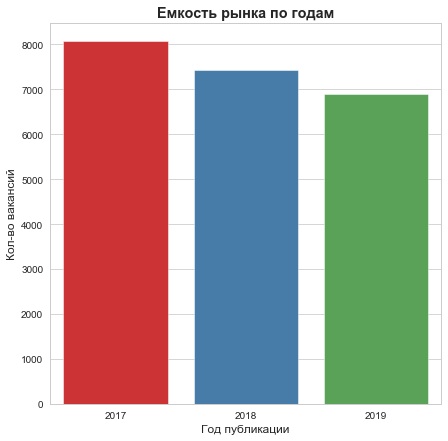

In [26]:
display(year_capacity)

plt.figure(figsize=(7, 7))
sns.set_style("whitegrid")
g = sns.barplot(data = year_capacity, x='publication_year', y='vacancy_count', palette='Set1')
g.set_title('Емкость рынка по годам', fontweight="bold")
g.set_xlabel('Год публикации')
g.set_ylabel('Кол-во вакансий');

#### Вывод:
Более 8т. вакансий тестировщиков в 2017 г. и далее наблюдается тенденция на спад, где ежегодно кол-во вакансий снижается, в среднем, на 500.

### Емкость рынка по регионам и по годам.

In [27]:
hh_qa.pivot_table(index=(['region_name', 'publication_year']), values='vacancy_name', aggfunc='count').sort_values(by='vacancy_name', ascending=False).head(15)

vacancy_name
region_name           publication_year              
Москва                2017                      2489
                      2019                      2402
                      2018                      2317
Санкт-Петербург       2017                      1468
                      2018                      1219
                      2019                      1155
Новосибирская область 2017                       362
                      2018                       317
                      2019                       270
Нижегородская область 2018                       265
                      2017                       241
                      2019                       234
Республика Татарстан  2017                       210
                      2019                       206
                      2018                       189

#### Вывод:
Лидирующие позиции занимают Москва и Санкт-Петербург, где емкость рынка ежегодно составляет, с среднем,  2400 вакансий и 1250 соответсвенно. Что неудивительно, ведь в этих города сосредоточено развитие IT инфраструктуры. Уже в Новосибирской области, который по емкости рынка уступает Санкт-Петербургу, видно резкое снижение кол-ва вакансий в 4 раза.

### Доля вакансий, в которой упоминается «исследовательское тестирование»

In [28]:
research_qa = hh_qa.query('vacancy_description.str.contains("исследовательское тестирование")', engine='python')

In [29]:
print('Доля вакансий, в которой упоминается «исследовательское тестирование»: {:.1%}'.format(len(research_qa) / len(hh_qa)))

Доля вакансий, в которой упоминается «исследовательское тестирование»: 2.3%


#### Вывод:
Всего в 2.3% процентах вакансий упоминается исследовательское тестирование. Многие скептически относятся к исследовательскому тестированию, так как считают, что это пустая трата времени и ресурсов.

### Распределение по регионам и количество вакансий с удаленной работой.

In [30]:
hh_qa_remote = hh_qa.query('work_schedule == "remote"')

In [31]:
hh_qa_remote.pivot_table(index='region_name', values='vacancy_name', aggfunc='count').sort_values(by='vacancy_name', ascending=False).head(10)

,vacancy_name
region_name,
Москва,350
Санкт-Петербург,159
Республика Татарстан,62
Нижегородская область,59
Новосибирская область,55
Самарская область,50
Ростовская область,46
Саратовская область,46
Свердловская область,44


#### Вывод:
Всего, на период с начала 2017г. по конец 2019г. на рынке были представлены 350 вакансий с удаленной работой для Москвы, 159 для Санкт-Петербурга и, в среднем, около 50 для других областей.

### Существуют ли сезонные пики и спады в распределении числа активных вакансий в течение года и если да — существуют везде или, например, в Москве спадов нет?

In [32]:
season = hh_qa.groupby(['publication_year', 'publication_month', 'publication_month_name'])['vacancy_name'].count().reset_index().sort_values(by='publication_month')

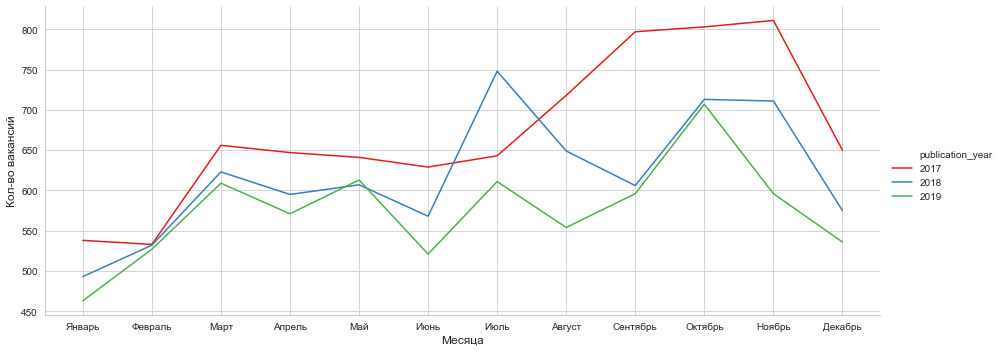

In [33]:
sns.set_style("whitegrid")
g = sns.relplot(data=season, x='publication_month_name', y='vacancy_name', hue='publication_year', kind='line', aspect=15/6, sort=False, palette='Set1')
g.set_axis_labels("Месяца", "Кол-во вакансий");

___
Для Москвы: 

In [34]:
season_moscow = hh_qa.query('city_name == "Москва"').groupby(['publication_year', 'publication_month', 'publication_month_name'])['vacancy_name'].count().reset_index().sort_values(by='publication_month')

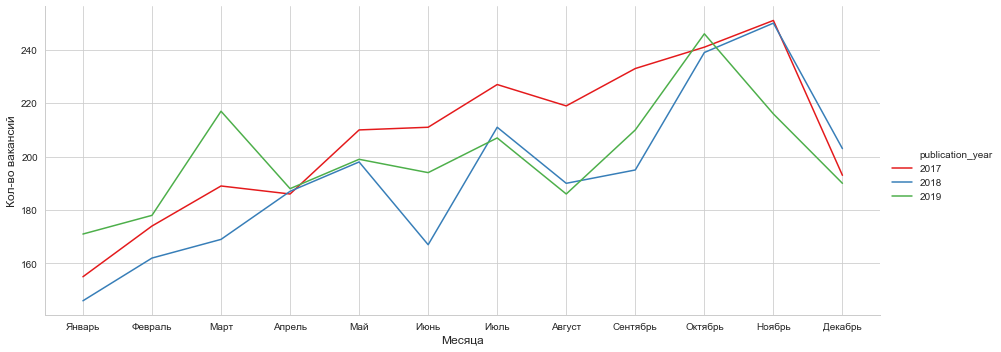

In [35]:
sns.set_style("whitegrid")
g = sns.relplot(data=season_moscow, x='publication_month_name', y='vacancy_name', hue='publication_year', kind='line', aspect=15/6, sort=False, palette='Set1')
g.set_axis_labels("Месяца", "Кол-во вакансий");

#### Вывод:
На рынке труда есть сезонные закономерности. В марте-апреле предложений больше, это «высокий сезон». Следующий высокий сезон будет осенью.  В мае активность работодателей в поиске снижается из-за праздников, летом — из-за отпусков. Зимой активность на кадровом рынке также значительно снижается — в конце года работодателям не до пополнения штата, все заняты подведением итогов, отчетами, дотягиванием до годовых KPI. То же характерно и для Москвы.

### Сколько вакансий-стажировок (с дополнительным к основной выборке словом «стажер»/«стажёр»/«стажировка» в названии) и их распределение по регионам

In [36]:
intern_qa = hh_qa.query('experience_required == "no_experience" and vacancy_name.str.contains("стажер|стажёр|стажировка")', engine='python')

In [37]:
intern_qa.pivot_table(index='region_name', values='vacancy_name', aggfunc='count').sort_values(by='vacancy_name', ascending=False).head(10)

,vacancy_name
region_name,
Москва,110
Санкт-Петербург,45
Нижегородская область,17
Воронежская область,15
Республика Татарстан,14
Рязанская область,10
Удмуртская Республика,10
Новосибирская область,10
Самарская область,5


#### Вывод:
Вакансий-стажировок среди тестировщиков довольно мало. В России бизнес все еще относится к этому явлению с опаской — студентов не берут совсем или доверяют им только "перекладывать бумажки". Неопытный сотрудник может обходится команде даже дороже senior-специалиста.

### Сколько вакансий джунов называются «тестировщик», «QA» или «QC»?

In [38]:
jun_len = len(hh_qa.query('experience_required == "no_experience" and vacancy_name.str.contains("тестировщик|qa|qc")', engine='python'))

In [39]:
print('Кол-во вакансий джунов с «тестировщик», «QA» или «QC» в названии:', jun_len)

Кол-во вакансий джунов с «тестировщик», «QA» или «QC» в названии: 2088


#### Не случился ли перекос в сторону наименования QA?

In [40]:
jun_qa = len(hh_qa.query('experience_required == "no_experience" and vacancy_name.str.contains("qa")', engine='python'))

In [41]:
jun_test = len(hh_qa.query('experience_required == "no_experience" and vacancy_name.str.contains("тестировщик")', engine='python'))

In [42]:
print('Кол-во вакансий джунов с "QA" в названии:', jun_qa)
print('Кол-во остальных вакансий джунов:', jun_test)
print('Доля вакансий джунов с "QA" в названии: {:.1%}'.format(jun_qa / jun_len))

Кол-во вакансий джунов с "QA" в названии: 876
Кол-во остальных вакансий джунов: 1512
Доля вакансий джунов с "QA" в названии: 42.0%


#### Вывод:
Вакансий джунов с "QA" в названии все еще меньше.

## Выводы:<a id="summary"></a>
### Исследовательский анализ:
- **Период данных:** с 2017-01-01 по 2019-12-31
- **Распределение вакансий по странам:** Основной массив данных приходится на Россию, есть также вакансии из Беларуси и Казахстана
- **Распределение вакансий по опыту:** Большинство вакансий предполагают опыт кандидата до 3х лет.
- **Распределение вакансий по типу занятости:** Большинство вакансий предполагают полный рабочий день.


- **3 самых часто упоменаемых навыка для тестировщика без опыта:**
    - Функциональное тестирование
    - SQL
    - Тестирование пользовательского интерфейса
    
    
- **Креативность вакансий:** В целом, неформальных слов в описании вакансий стало больше

### Вопросы от заказчика:
- **Емкость рынка по годам:** 8т. вакансий в 2017 г. и 7т. в 2019 г., наблюдается тенденция на спад
- **Емкость рынка по регионам и годам:** Лидируют Москва и Санкт-Петербург, в других регионах вакансий представленно в 4-5 раз меньше.
- **Доля вакансий, в которой упоминается «исследовательское тестирование»:** 2.3%
- **Распределение по регионам и количество вакансий с удаленной работой:** Больше всего таких вакансий в Москве, почти в 2 раза - меньше в Санкт-Петербурге и в 3 раза меньше в других регионах.
- **Сезонные пики:** Много вакансий весной и осенью. Предположительно, летом мало вакансий из-за отпусков, зимой - из-за загруженности.
- **Сколько вакансий-стажировок:** Из 7т. вакансий для Москвы, только 110 были стажировками. Для остальных регионов - таких вакансий практически нет.
- **Сколько вакансий джунов называются «тестировщик»:** «QA» или «QC»: 2088 вакансий
- **Не случился ли перекос в сторону наименования QA?:** Вакансий с QA в названии 42%

## Рекомендации:
Студенты QA факультета могут откликнуться на вакансии младшего QA тестировщика, вакансии без опыта либо на вакансии-стажировки.
Ниже представлена таблица подобных вакансий:

In [43]:
vacancies_for_juniors = hh_qa.query('vacancy_name.str.contains("junior|младший") or experience_required == "no_experience"', engine='python').reset_index(drop=True)
vacancies_for_juniors.head()

,vacancy_id,vacancy_name,vacancy_description,experience_required,type_of_employment,work_schedule,publication_day,city_name,region_name,country_name,list_of_profarea_ids,list_of_skill_names,publication_year,publication_month,publication_month_name
0,23920048,тестировщик по,обязанности: - тестирование web-сайтов - тести...,no_experience,full,full_day,2017-12-25,Москва,Москва,Россия,1,[None],2017,12,Декабрь
1,22728748,тестировщик мморпг,friday’s games – студия-разработчик мобильных ...,no_experience,full,full_day,2017-09-14,Новосибирск,Новосибирская область,Россия,1,[None],2017,9,Сентябрь
2,20288758,qa specialist (автоматизированное тестирование),если ты хочешь развиваться в автоматизированно...,no_experience,full,full_day,2017-04-18,Москва,Москва,Россия,1,[None],2017,4,Апрель
3,22900564,младший qa инженер,команда разработки hearst shkulev digital в по...,up_to_3_years,full,full_day,2017-11-13,Новосибирск,Новосибирская область,Россия,1,"['Тестирование', 'Linux', 'QA', 'SQL']",2017,11,Ноябрь
4,19734864,тестировщик по,"обязанности: проведение функционального, инте...",no_experience,full,full_day,2017-03-30,Москва,Москва,Россия,1,[None],2017,3,Март


Большинство вакансий, на которые может откликнуться начинающий QA тестировщик представлены в России. В Беларуси тоже можно наткнуться на подобную вакансию. Совсем уж мало в Казахстане. Но в целом, кол-во подобных вакансий с годами растет.

In [44]:
jun_capacity = vacancies_for_juniors.groupby(['country_name', 'publication_year'])['vacancy_id'].count().reset_index().sort_values(by=(['country_name', 'publication_year']),ascending=False).set_index('country_name')
jun_capacity

,publication_year,vacancy_id
country_name,,
Россия,2019,1015
Россия,2018,910
Россия,2017,892
Казахстан,2019,16
Казахстан,2018,6
Казахстан,2017,23
Беларусь,2019,126
Беларусь,2018,110
Беларусь,2017,118
